# How are in-demand skills trending for Data Analysts?
#### Methodology
1. Import required libaries and dataset.
2. Clean the dataset.
3. Focus the analysis to job postings in India and job title as Data Analyst.
4. Group skills by month.
5. Calculate the percentage representation of each skill across different months.
6. Visualize the findings.

### Import Required Libraries for Analysis
This code imports libraries for data analysis and visualization. `pandas` handles structured data, `matplotlib` and `seaborn` create visualizations, and `ast` analyzes Python code structures. `datasets` likely accesses pre-built datasets for machine learning or analysis.

In [ ]:
#Import the required libaries
import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

### Import Dataset
This code loads a dataset from the `datasets` library (Hugging Face's). The `load_dataset` function fetches the `'lukebarousse/data_jobs'` dataset. The 'train' split of the dataset is then converted into a pandas DataFrame for easier data manipulation and analysis.

In [2]:
#Import dataset
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 

### Data Cleanup
The `pd.to_datetime()` function is used to convert the `job_posted_date` column into a datetime format.

The `new_list` function checks if a value in `job_skills` is not null, and if so, uses `ast.literal_eval() `to safely evaluate the string as a Python literal (i.e., converting it from a string representation of a list to an actual list). This transformation is applied to the `job_skills` column using `.apply()`.

In [3]:
#Converted the datatype for job_posted_date from object to datetime
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

#Coverted the datatype for skill_list from string to list
def new_list(skill_list):  
   if pd.notna(skill_list): 
      return ast.literal_eval(skill_list)  
df['job_skills'] = df.job_skills.apply(new_list)

### Filter df_India dataset for only job_country as India and job_title_short as Data Analyst
This code filters the dataset `df` to create a new DataFrame, `df_India`, that contains only the rows where the `job_country` column is equal to `'India'` and rows where `job_title_short` column  is equal to `'Data Analyst'`. It essentially extracts all job postings in the dataset that are associated with India.

In [4]:
df_India = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()

### Grouping Job Skills by Month
This code processes the `df_India` dataframe to analyze the demand for job skills by month. It begins by extracting the month from the job posting dates and storing it in a new column. The job skills, initially stored as lists, are separated into individual rows for detailed analysis. A pivot table is then created to count the occurrences of each skill by month, with missing values replaced by zero. A total row is added to sum up skill occurrences across all months, and the data is sorted in descending order based on these totals. Finally, the total row is removed, leaving a detailed breakdown of monthly demand for each skill.

In [5]:
#Extract the month from the df_India dataframe
df_India['job_posted_month_no'] = df_India['job_posted_date'].dt.month

#Separate each item in the 'job_skills' column (a list) into individual rows in the df_India dataframe
df_India_explode = df_India.explode('job_skills')

# Create a pivot table to count job skills by posting month, replacing missing values with 0
df_India_pivot = df_India_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# Include a total row that sum up each skills in all 12 months
df_India_pivot.loc['Total'] = df_India_pivot.sum() 

#Sorts the changes made above for total of each skills in descending order
df_India_pivot =df_India_pivot[df_India_pivot.loc['Total'].sort_values(ascending=False). index]

#Drop the total row
df_India_pivot = df_India_pivot.drop('Total')

df_India_pivot

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,1,0,0,0,0,0,0,1,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,0,1,0,0,0,1,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,0,0,0,0,0,0,0,0,1
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,0
7,245,161,174,124,93,67,78,39,31,31,...,1,0,1,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,0,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


### Visualizing Top Data Analyst Skills by Month in India
This code generates a line plot to visualize the monthly demand for the top five skills for data analysts. It selects the first five columns of the `df_India_pivot` dataframe, which represent the most in-demand skills, and plots their counts across all months. The resulting visualization highlights trends in the demand for these skills over time.

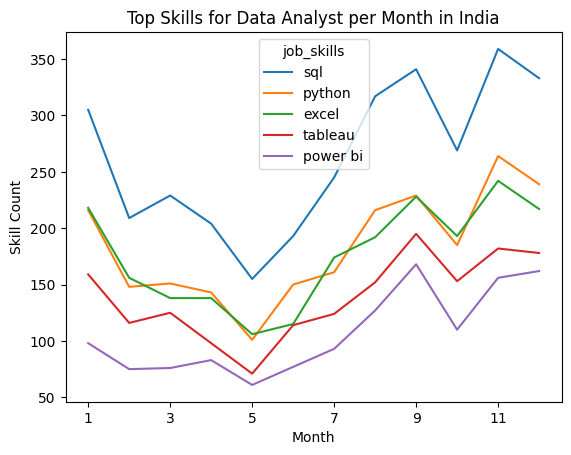

In [6]:
df_India_pivot.iloc[:, :5].plot(kind='line') #Create a line plot for the top skills during each month
    
plt.title('Top Skills for Data Analyst per Month in India')
plt.ylabel('Skill Count')
plt.xlabel('Month')
plt.show()

### Counting Job Postings by Month
This code calculates the number of job postings for each month in the `df_India` dataframe. It uses the `value_counts()` function on the `job_posted_month_no` column to count how many job postings occurred in each month, then sorts these counts in ascending order of the month numbers. The resulting series, `DA_India`, provides a month-by-month overview of job postings.

In [7]:
DA_India = df_India['job_posted_month_no'].value_counts().sort_index(ascending=True)
DA_India

job_posted_month_no
1     628
2     433
3     422
4     418
5     278
6     367
7     457
8     618
9     630
10    500
11    722
12    648
Name: count, dtype: int64

### Calculating the Percentage Contribution of Skills by Month
This code calculates the percentage contribution of each skill to the total job postings for each month. It divides the counts in the first 12 rows of the `df_India_pivot` dataframe by the total job postings per month (from `DA_India`) scaled to percentages. The resulting dataframe, `df_India_percent`, shows the relative demand for each skill as a percentage of the total job postings for each month.

In [8]:
df_India_percent = df_India_pivot.iloc[:12].div(DA_India/100, axis=0)
df_India_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.159236,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.159236,0.000000
2,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.000000,0.236967,0.0,0.000000,0.000000,0.236967,0.000000,0.000000
4,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.359712
6,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.218818,0.000000,0.218818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


### Formatting Skill Demand Percentages by Month
This code enhances the readability of the `df_India_percent` dataframe by resetting its index and adding a new column for month names. The `job_posted_month` a three-letter month abbreviation (e.g., "Jan") is extracted from `job_posted_month_no` column using a lambda function with `pd.to_datetime` and `strftime`. The resulting job_posted_month column is then set as the new index, and the original `job_posted_month_no` column is dropped. The final df_India_percent dataframe provides percentage contributions of skills with month names as the index for improved clarity.

In [9]:
df_India_percent = df_India_percent.reset_index()
df_India_percent['job_posted_month'] = df_India_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_India_percent = df_India_percent.set_index('job_posted_month')
df_India_percent = df_India_percent.drop(columns='job_posted_month_no')
df_India_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.159236,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.159236,0.000000
Feb,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.000000,0.236967,0.0,0.000000,0.000000,0.236967,0.000000,0.000000
Apr,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
May,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.359712
Jun,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.218818,0.000000,0.218818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


### Visualizing Likelihood of Top Data Analyst Skills by Month
This code generates a line plot using the top five skills from the `df_India_percent` dataframe to show their percentage likelihood in job postings over each month. 

The PercentFormatter converts the y-axis values into percentages, making the data easier to interpret. The sns.despine() function removes extra spines, giving the plot a cleaner look. Adding text annotations at the end of each line directly labels the skills, eliminating the need for a legend and improving clarity.

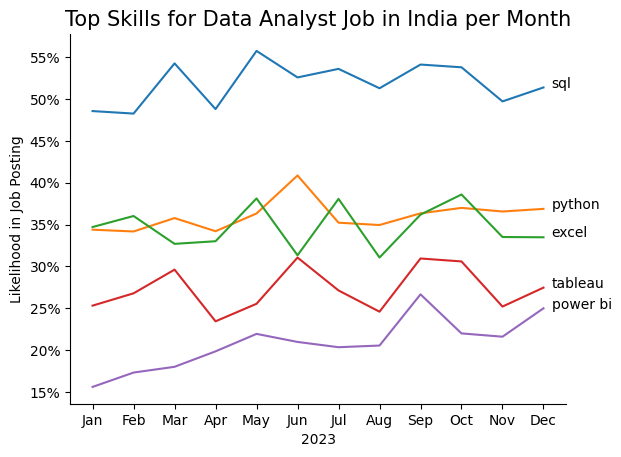

In [11]:
from matplotlib.ticker import PercentFormatter

df_lineplot = df_India_percent.iloc[:, :5]
sns.lineplot(data=df_lineplot, dashes=False, legend='full', palette='tab10')
sns.despine()

plt.title('Top Skills for Data Analyst Job in India per Month', fontsize=15)
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_lineplot.iloc[-1, i], df_lineplot.columns[i], color='black')